In [1]:

import c302
from c302.ConnectomeReader import analyse_connections
from c302.ConnectomeReader import check_neurons

all_data = {}
all_data["Values"] =["Num neurons", 
                     "Missing neurons", 
                     "Non neurons", 
                     "Num muscles", 
                     "Num N->N conns", 
                     "Num N with ->M", 
                     "Num N->M conns", 
                     "N->N neurotrans.", 
                     "N->M neurotrans."]

readers = {"SSData": "c302.SpreadsheetDataReader", 
           "UpdSSData": "c302.UpdatedSpreadsheetDataReader",
           "UpdSSData2": "c302.UpdatedSpreadsheetDataReader2",
           "OpenWorm": "c302.OpenWormReader",
           "White_A": "c302.White_A", 
           "White_L4": "c302.White_L4", 
           "White_whole": "c302.White_whole",
           "Varshney": "c302.VarshneyDataReader",
           "Witvliet1": "c302.WitvlietDataReader1",
           "Witvliet2": "c302.WitvlietDataReader2",
           "WormNeuroAtlas": "c302.WormNeuroAtlasReader",
           "Cook2019Herm": "c302.Cook2019HermReader",
          }

def shorten_neurotransmitter(nt):
    return nt.replace('Acetylcholine', 'ACh').replace('Serotonin', '5HT').replace('Glutamate', 'Glu')\
             .replace('Tyramine', 'Tyr').replace('FMRFamide','FMRFam').replace('Generic_', 'Gen_')

for name, reader in readers.items():

    print("\n****** Importing dataset %s using %s ******"% (name, reader))
    

    exec("from %s import read_data, read_muscle_data"%reader)
    cells, neuron_conns = read_data(include_nonconnected_cells=True)

    preferred, not_in_preferred, missing_preferred = check_neurons(cells)

    neuron_nts = {}
    for c in neuron_conns:
        nt = c.synclass
        if len(nt)==0: nt='**MISSING**'

        if not nt in neuron_nts:
            neuron_nts[nt] = 0
        
        neuron_nts[nt] +=1
    
    nts_info = ''
    for nt in sorted(neuron_nts.keys()):
        nts_info+='%s (%i)<br/>'%(shorten_neurotransmitter(nt), neuron_nts[nt])

 
    neurons2muscles, muscles, muscle_conns = read_muscle_data()
    
    muscle_nts = {}
    for c in muscle_conns:
        nt = c.synclass
        if len(nt)==0: nt='**MISSING**'

        if not nt in muscle_nts:
            muscle_nts[nt] = 0
        
        muscle_nts[nt] +=1
    
    m_nts_info = ''
    for nt in sorted(muscle_nts):
        m_nts_info+='%s (%i)<br/>'%(shorten_neurotransmitter(nt), muscle_nts[nt])


    all_data[name] =[len(preferred),
                     len(missing_preferred), 
                     len(not_in_preferred), 
                     len(muscles), 
                     len(neuron_conns), 
                     len(neurons2muscles), 
                     len(muscle_conns),
                     nts_info,
                     m_nts_info]

print('\nFinished loading all the data from the readers!')


****** Importing dataset SSData using c302.SpreadsheetDataReader ******
c302      >>>  Opened Excel file: /opt/homebrew/anaconda3/envs/py39n/lib/python3.9/site-packages/c302/data/CElegansNeuronTables.xls
c302      >>>  Opened Excel file: /opt/homebrew/anaconda3/envs/py39n/lib/python3.9/site-packages/c302/data/CElegansNeuronTables.xls

****** Importing dataset UpdSSData using c302.UpdatedSpreadsheetDataReader ******
c302      >>>  Opened file: /opt/homebrew/anaconda3/envs/py39n/lib/python3.9/site-packages/c302/data/herm_full_edgelist.csv
c302      >>>  Opened file: /opt/homebrew/anaconda3/envs/py39n/lib/python3.9/site-packages/c302/data/herm_full_edgelist.csv

****** Importing dataset UpdSSData2 using c302.UpdatedSpreadsheetDataReader2 ******
c302      >>>  Opened file: /opt/homebrew/anaconda3/envs/py39n/lib/python3.9/site-packages/c302/data/herm_full_edgelist_MODIFIED.csv
c302      >>>  Opened file: /opt/homebrew/anaconda3/envs/py39n/lib/python3.9/site-packages/c302/data/herm_full_edg

/opt/homebrew/anaconda3/envs/py39n/lib/python3.9/site-packages/wormneuroatlas/WormBase.py:52: UserWarning: Wormbase.org updated its database to a new version (WS291). The version of Worm Neuro Atlas that you are using has been built for the wormbase database version WS287. To ensure reproducible results, upgrade Worm Neuro Atlas with `python -m pip install --upgrade wormneuroatlas` If this warning persists after upgrading, let the developers know by opening an issue here: https://github.com/francescorandi/wormneuroatlas/issues. NOTE: You can still use Worm Neuro Atlas in the meantime. The metadata accessible via  wormneuroatlas.WormBase.get_metadata() and wormneuroatlas.NeuroAtlas.get_metadata() contain the version of wormbase that you are currently using, so make sure you save the metadata alongside your results. 
  warnings.warn(w)


c302      >>>  Initialising WormNeuroAtlasReader

****** Importing dataset Cook2019Herm using c302.Cook2019HermReader ******
c302      >>>  Opened the Excel file: /opt/homebrew/anaconda3/envs/py39n/lib/python3.9/site-packages/c302/data/SI 5 Connectome adjacency matrices.xlsx
Looking at sheet: hermaphrodite chemical
Looking at sheet: herm gap jn symmetric

Finished loading all the data from the readers!


In [2]:
import pandas as pd
import numpy as np
from IPython.display import HTML

df_all = pd.DataFrame(all_data)
df_all.set_index("Values")

h = HTML(df_all.to_html(escape=False, index=False));h


=== Generating using reader c302.SpreadsheetDataReader (SSData)
c302      >>>  Set default parameters for C
c302      >>>  Set default parameters for C
c302      >>>  Set default parameters for C
c302      >>>  Set default parameters for C1
c302      >>>  Opened Excel file: /opt/homebrew/anaconda3/envs/py39n/lib/python3.9/site-packages/c302/data/CElegansNeuronTables.xls
c302      >>>  Opened Excel file: /opt/homebrew/anaconda3/envs/py39n/lib/python3.9/site-packages/c302/data/CElegansNeuronTables.xls
c302      >>>  Writing generated network to: /Users/padraig/c302/examples/test/images/c302_C1_Social.net.nml
c302      >>>  (Re)written network file to: images/c302_C1_Social.net.nml
c302      >>>  Saving connectivity figure to: ./images/Social/SSData_exc_to_neurons.png
c302      >>>  Saving connectivity figure to: ./images/Social/SSData_elec_neurons_neurons.png

=== Generating using reader c302.UpdatedSpreadsheetDataReader (UpdSSData)
c302      >>>  Set default parameters for C
c302      

/opt/homebrew/anaconda3/envs/py39n/lib/python3.9/site-packages/c302/c302_utils.py:369: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=figsize)


c302      >>>  Saving connectivity figure to: ./images/Social/WormNeuroAtlas_elec_neurons_neurons.png

=== Generating using reader c302.Cook2019HermReader (Cook2019Herm)
c302      >>>  Set default parameters for C
c302      >>>  Set default parameters for C
c302      >>>  Set default parameters for C
c302      >>>  Set default parameters for C1
c302      >>>  Writing generated network to: /Users/padraig/c302/examples/test/images/c302_C1_Social.net.nml
c302      >>>  (Re)written network file to: images/c302_C1_Social.net.nml
c302      >>>  Saving connectivity figure to: ./images/Social/Cook2019Herm_exc_to_neurons.png
c302      >>>  Saving connectivity figure to: ./images/Social/Cook2019Herm_elec_neurons_neurons.png
Finished generation of images!

=== Generating using reader c302.SpreadsheetDataReader (SSData)
c302      >>>  Set default parameters for C
c302      >>>  Set default parameters for C
c302      >>>  Set default parameters for C
c302      >>>  Set default parameters for C1
c30

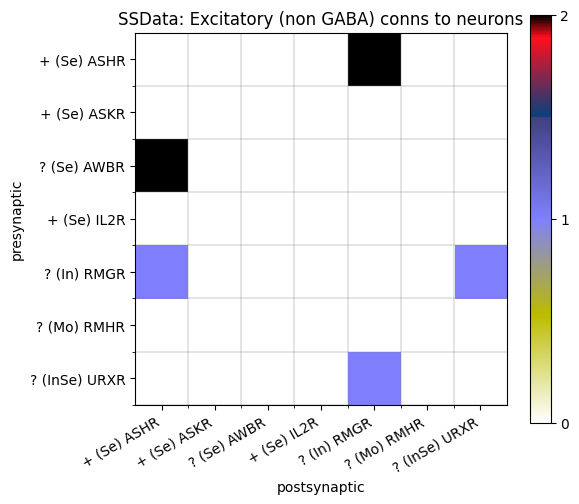

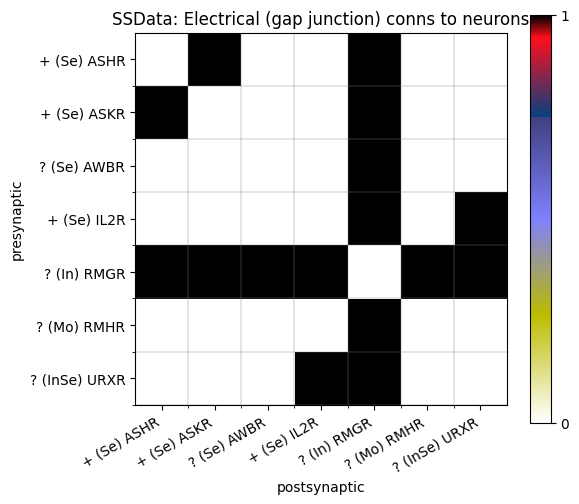

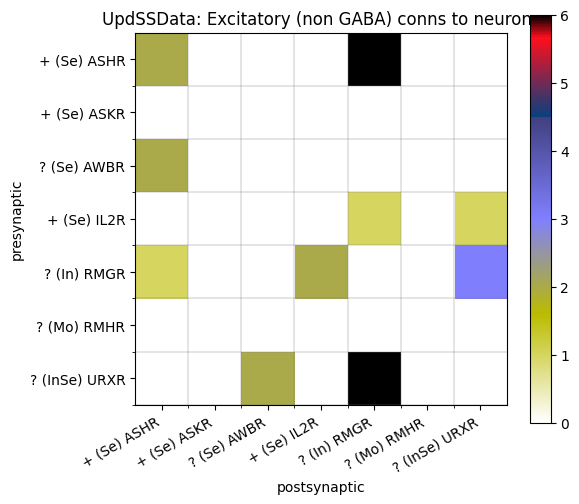

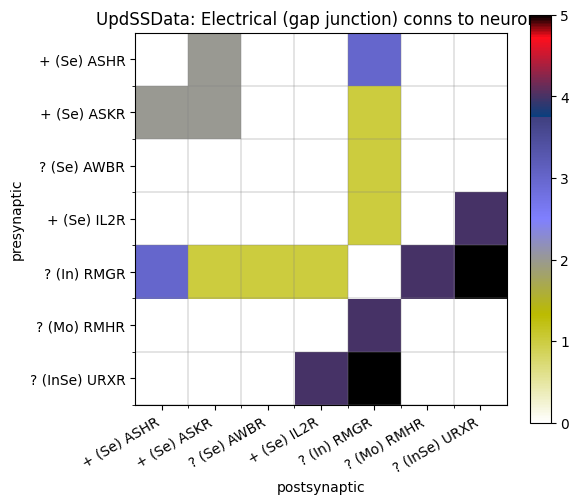

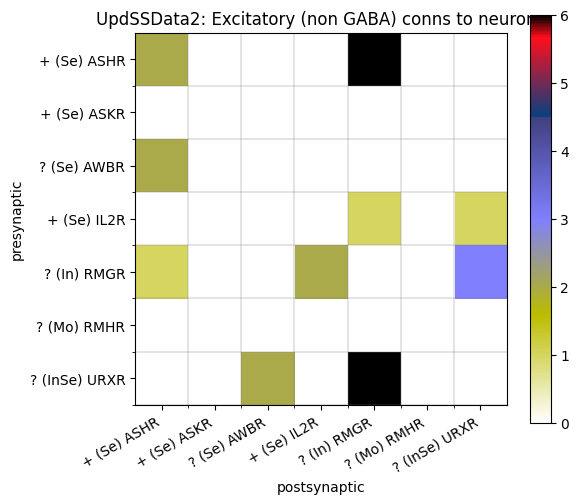

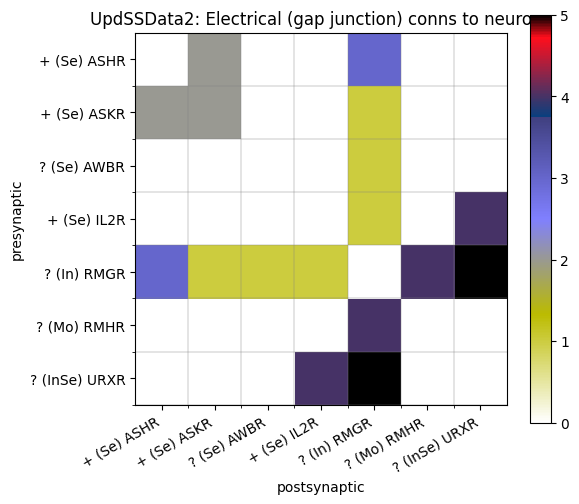

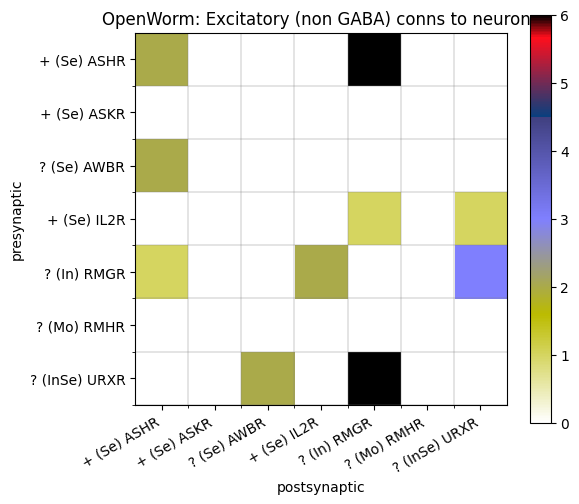

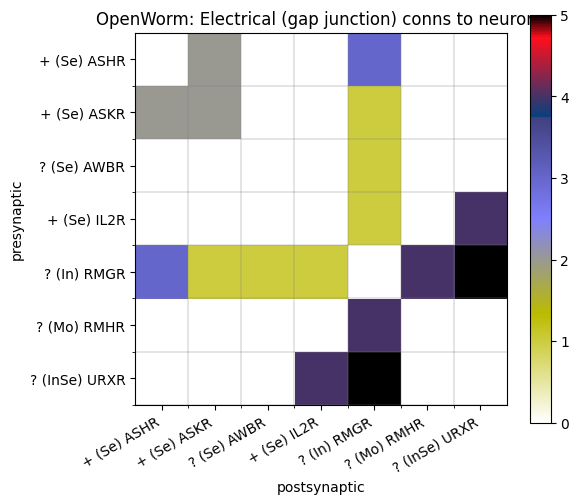

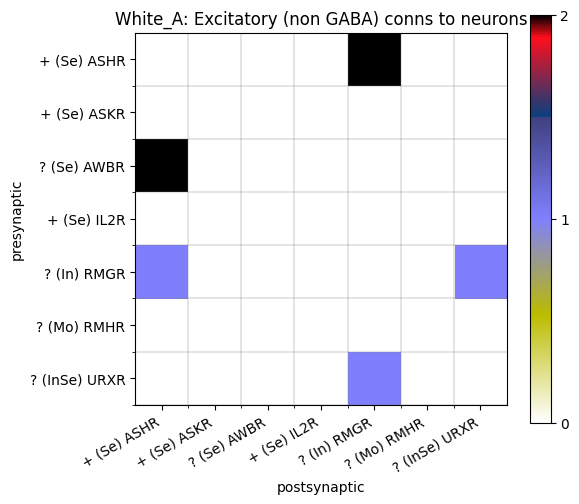

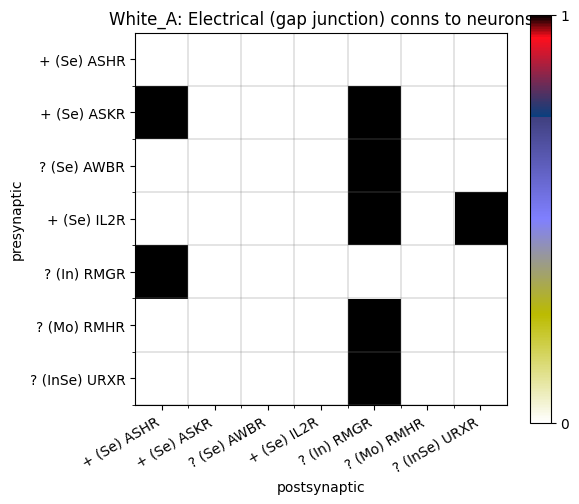

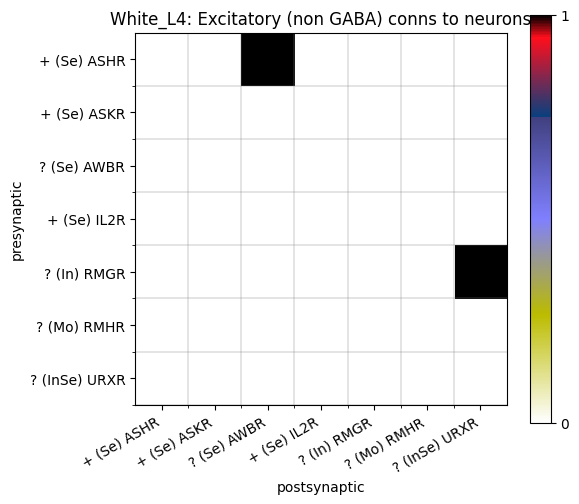

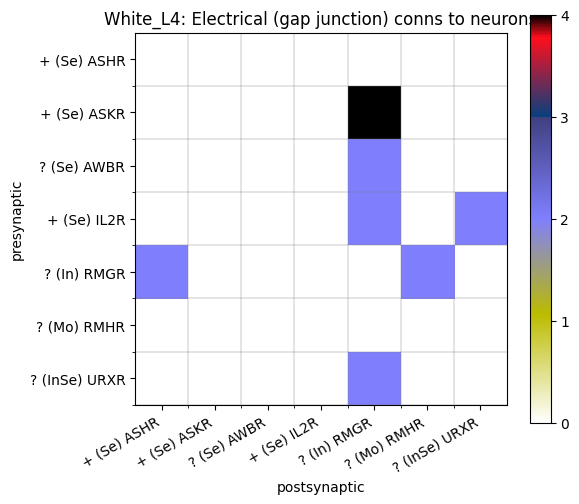

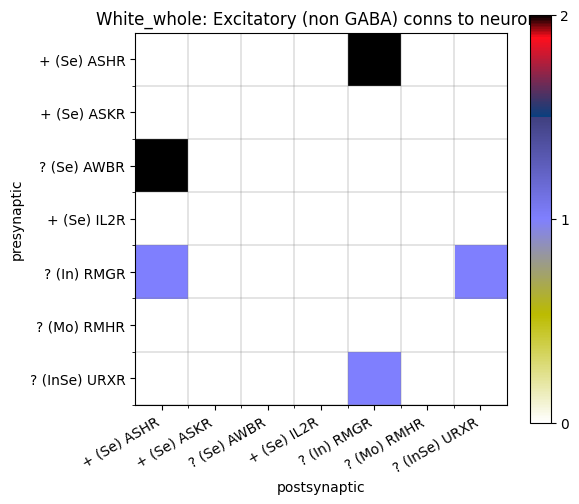

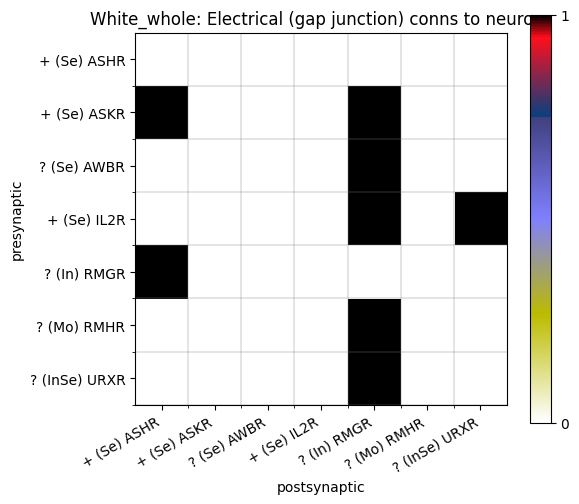

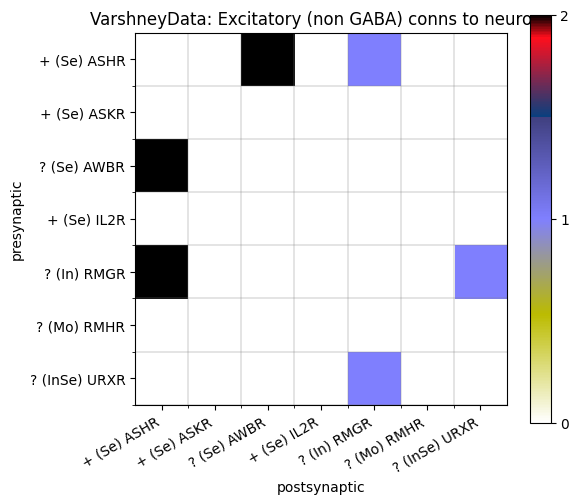

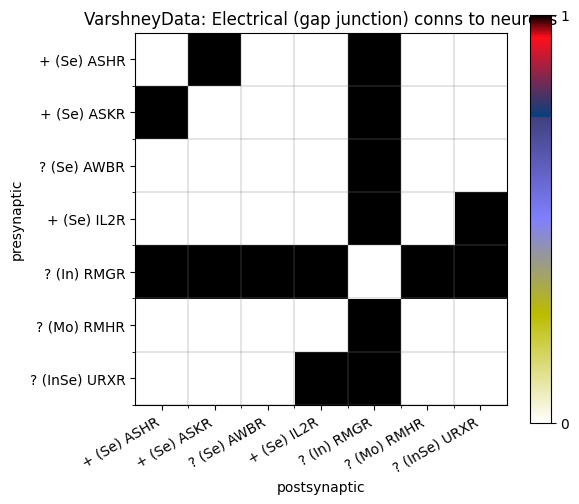

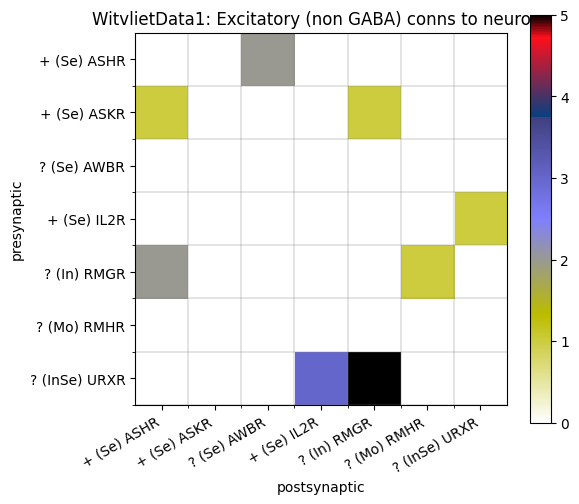

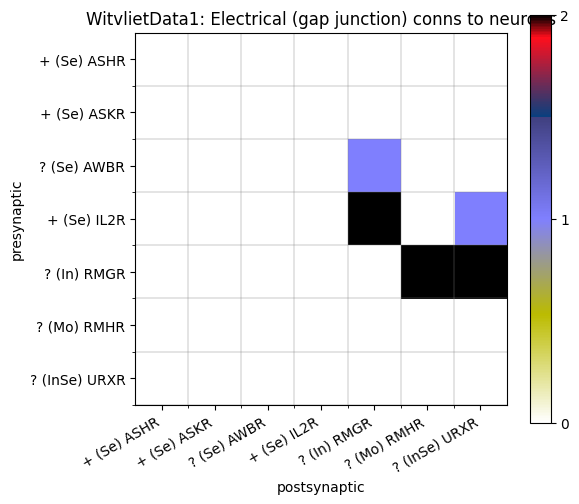

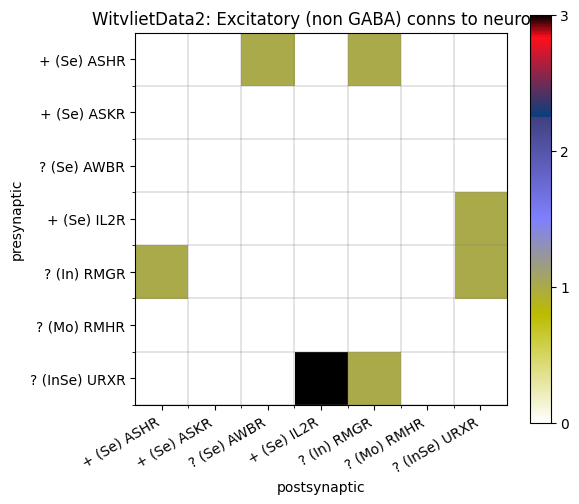

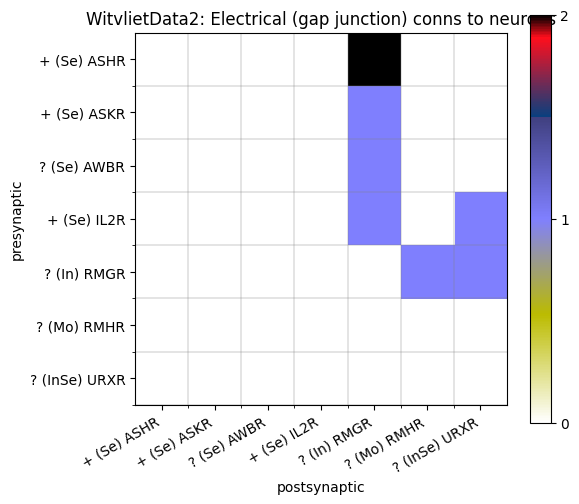

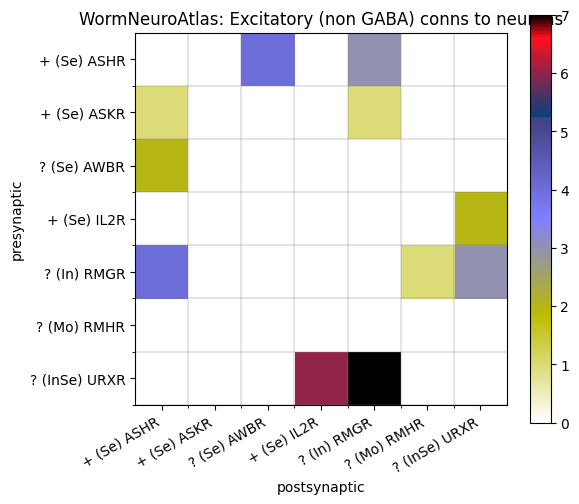

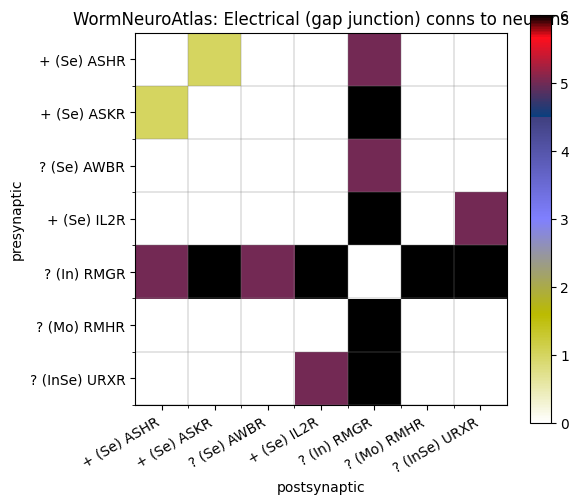

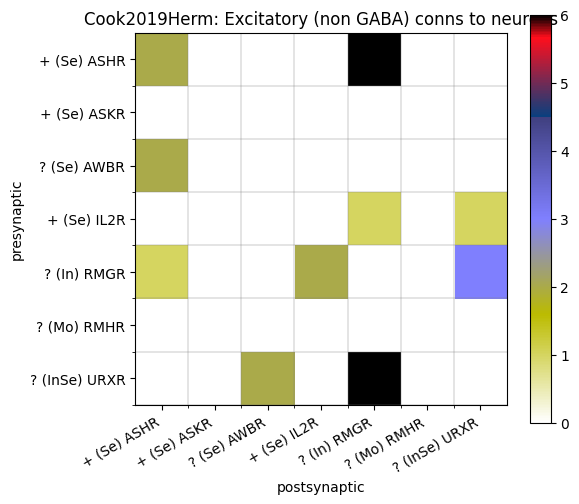

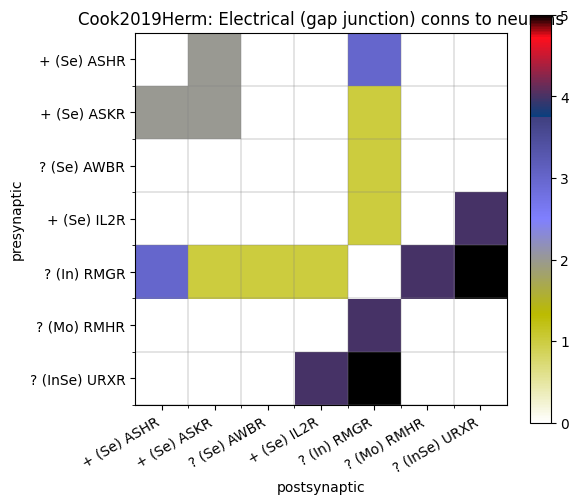

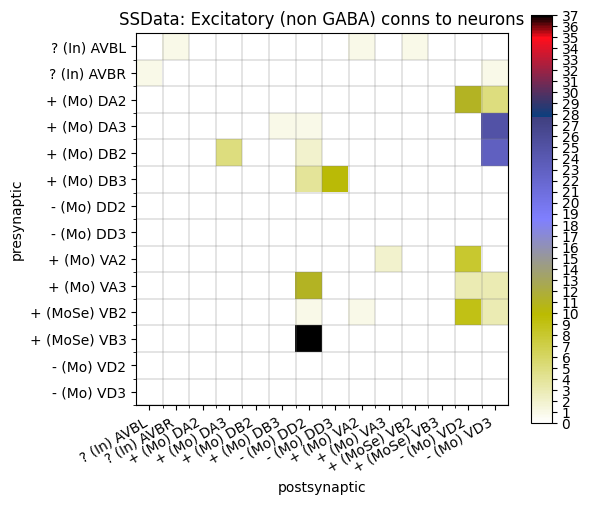

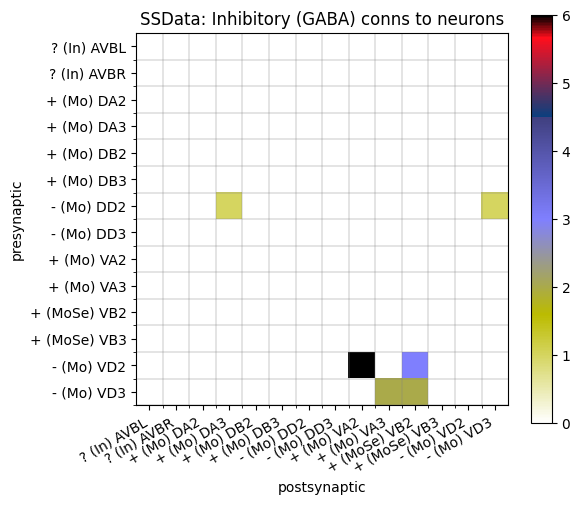

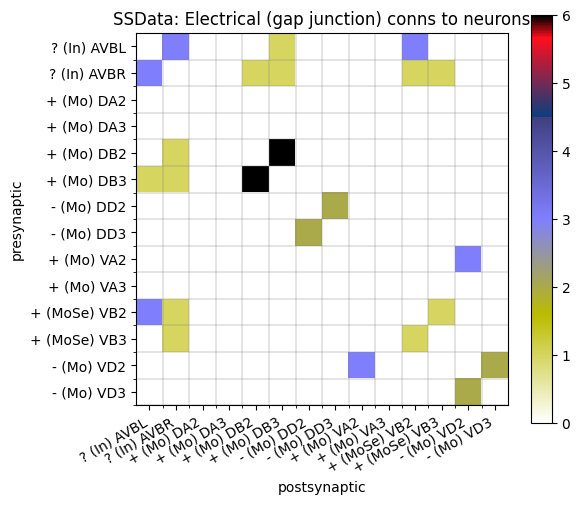

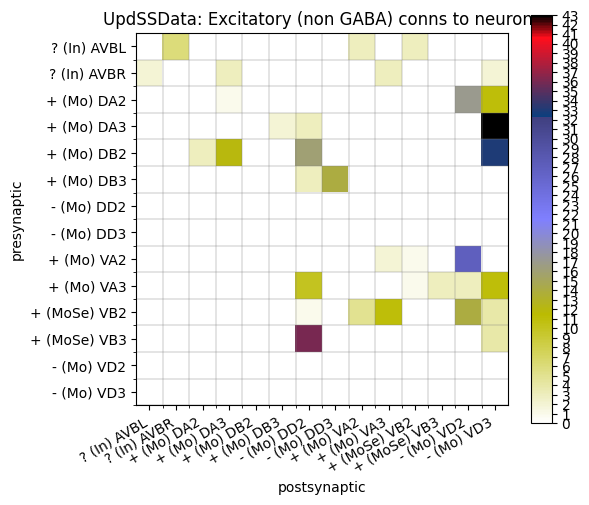

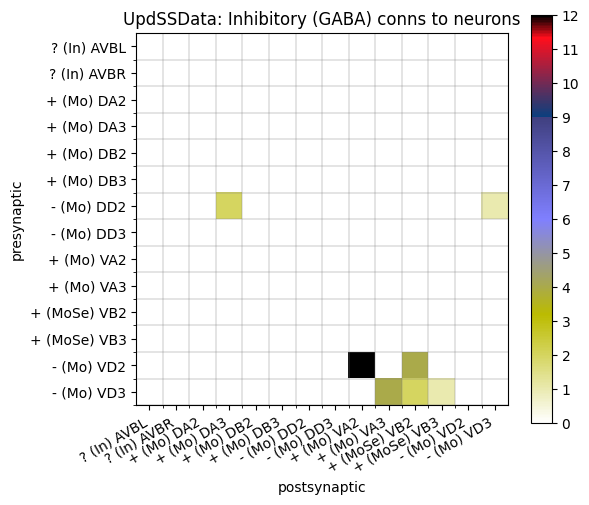

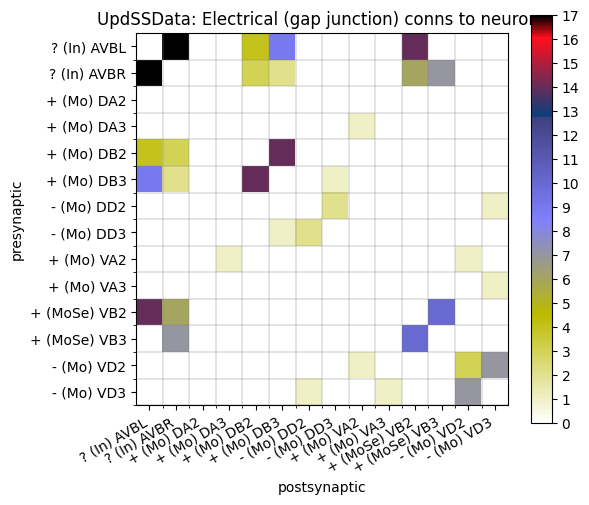

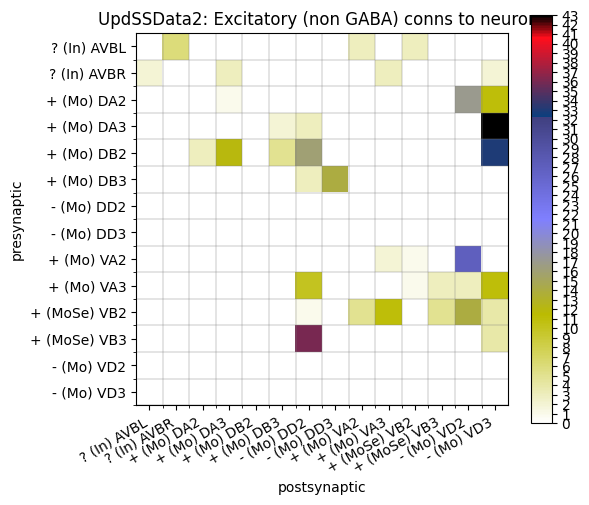

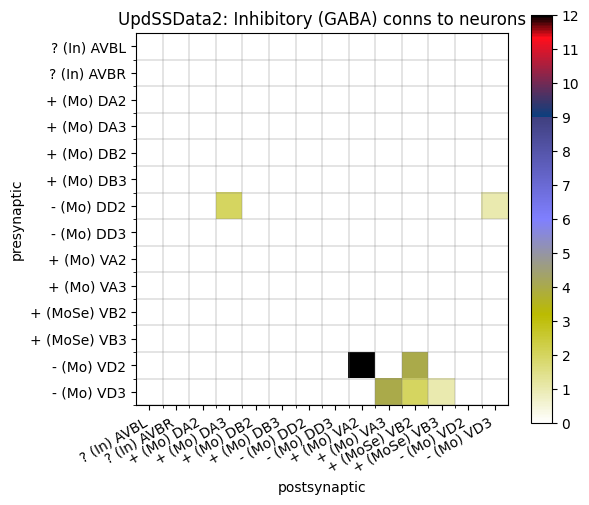

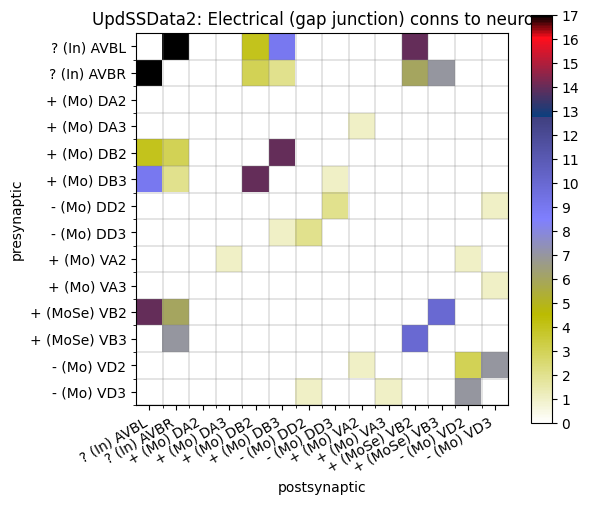

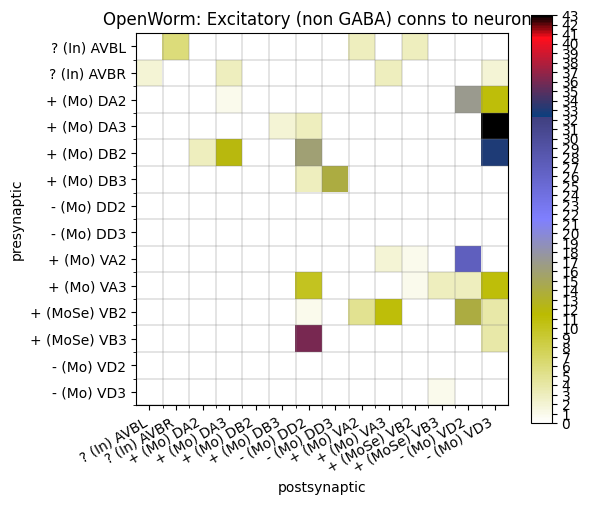

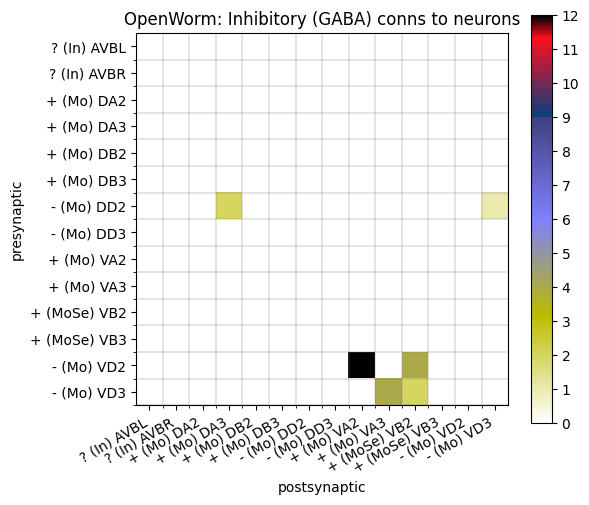

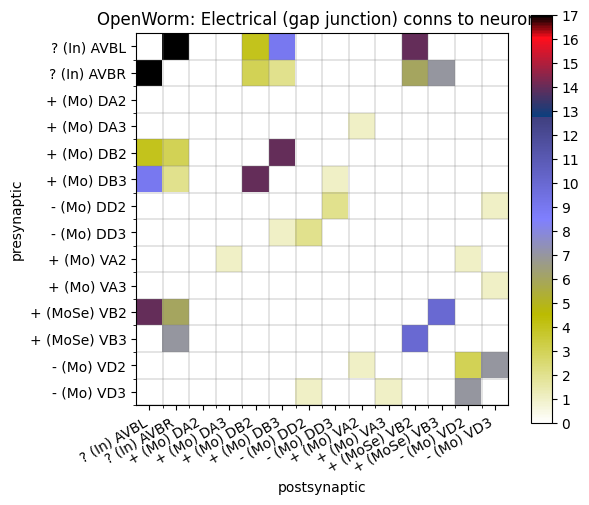

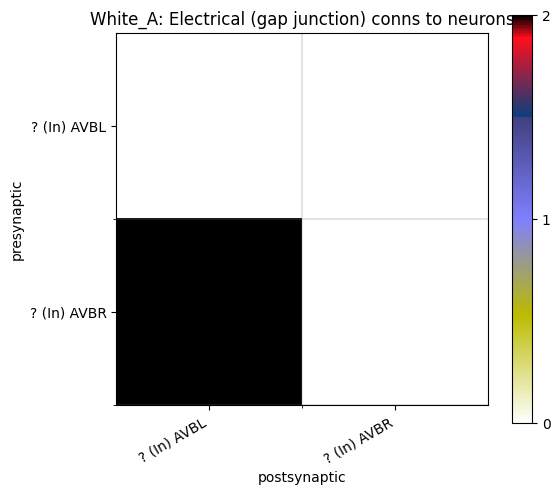

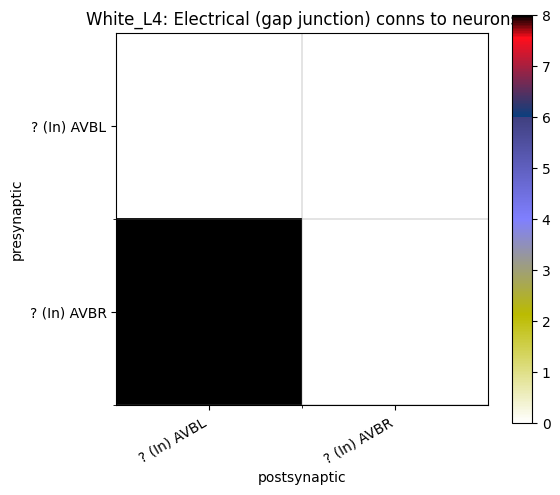

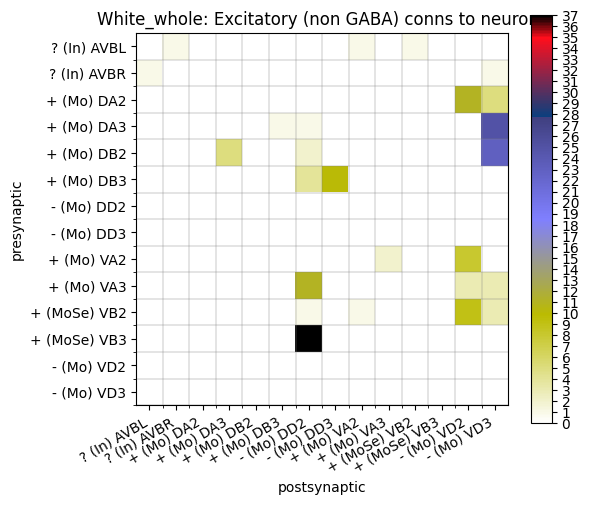

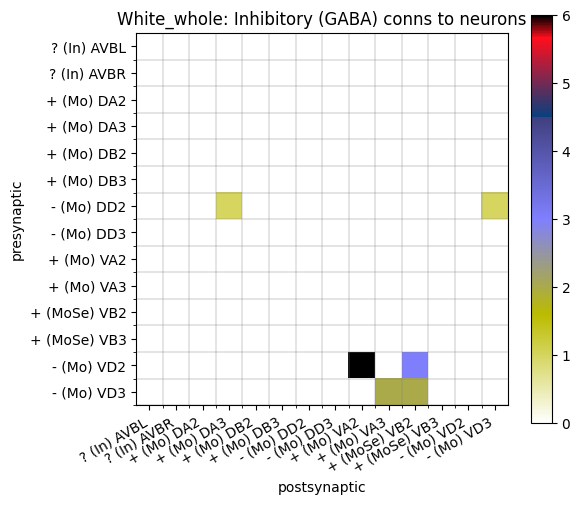

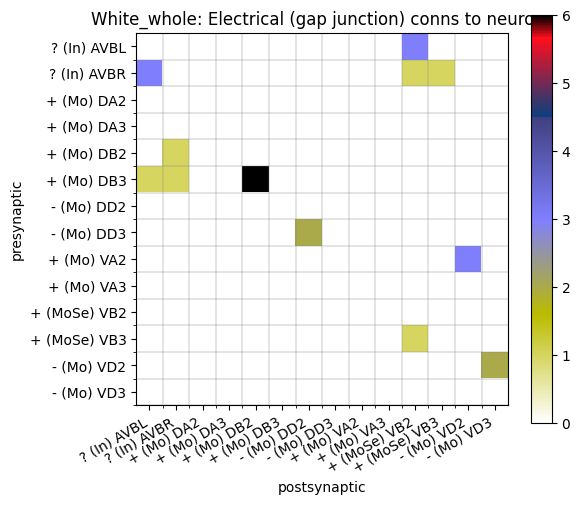

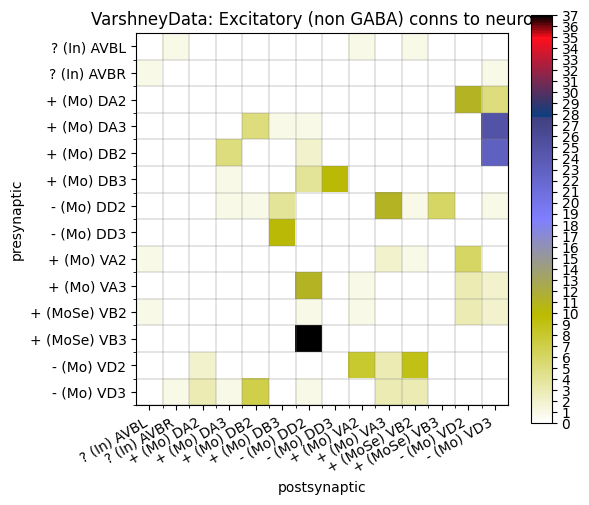

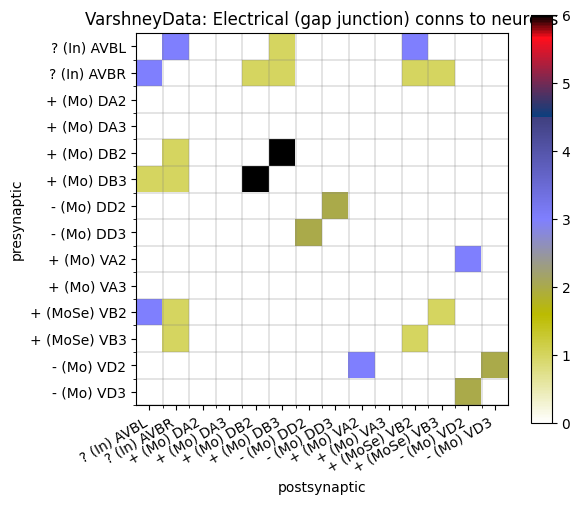

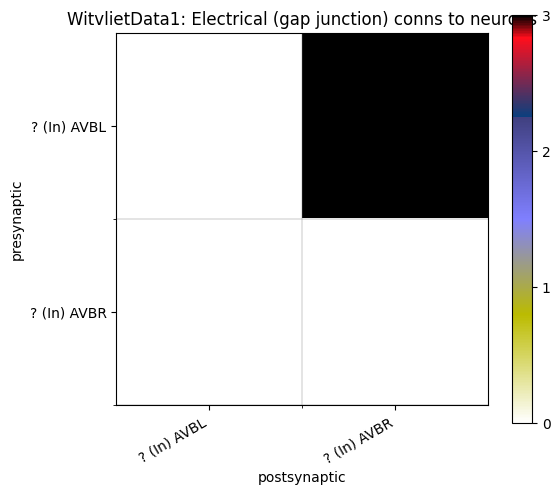

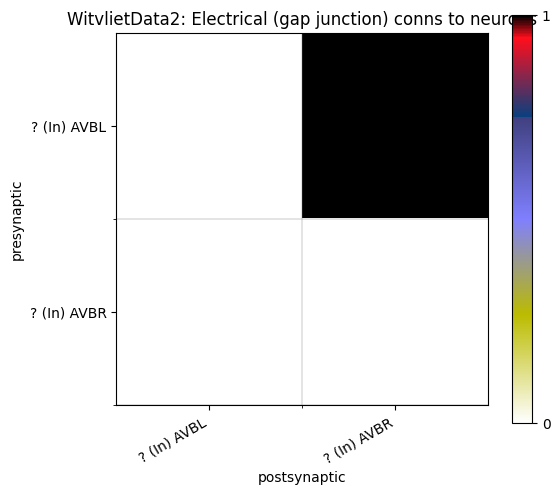

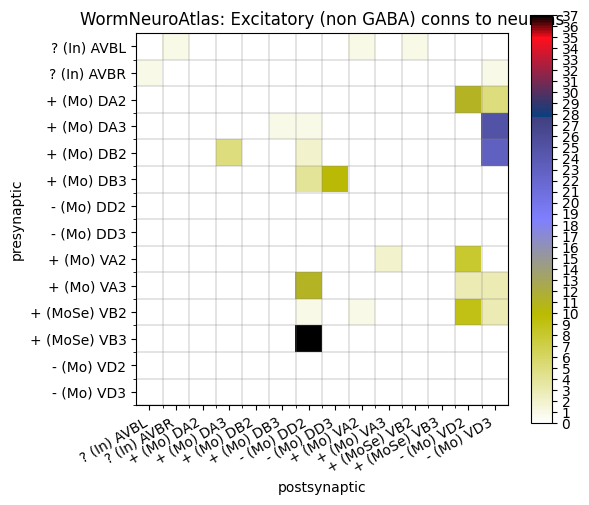

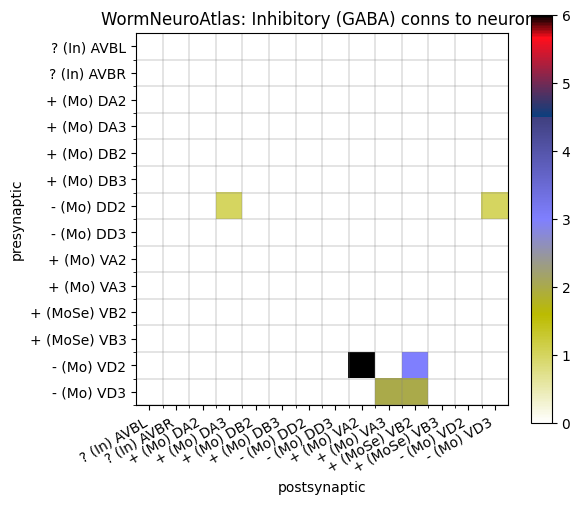

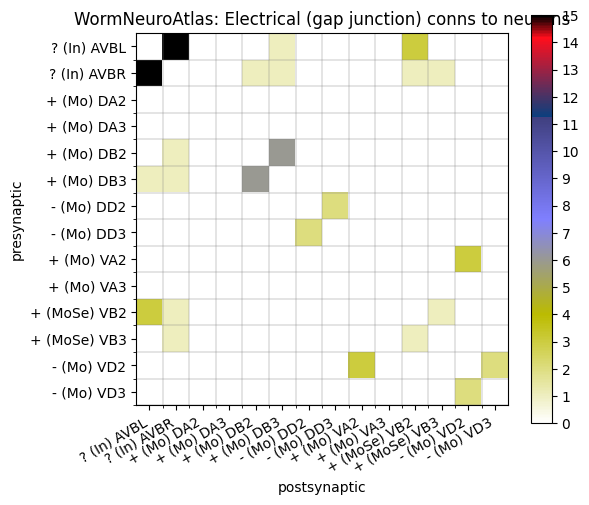

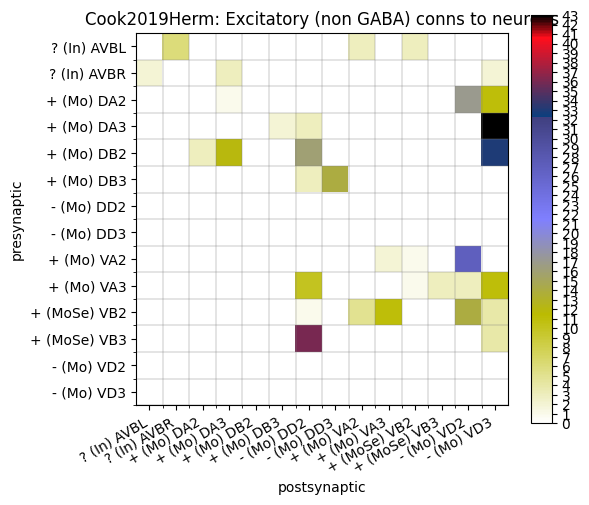

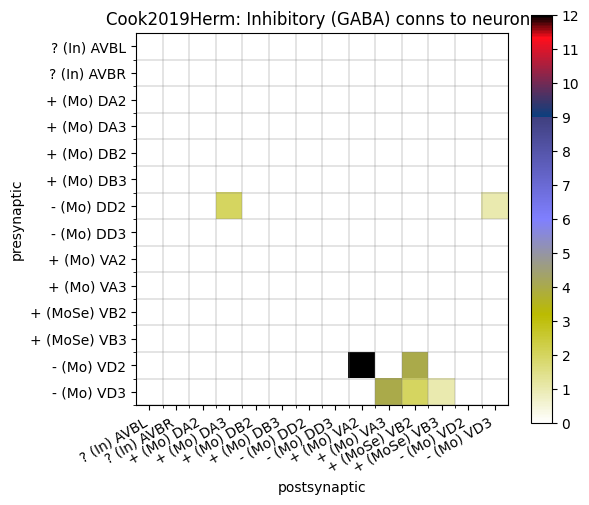

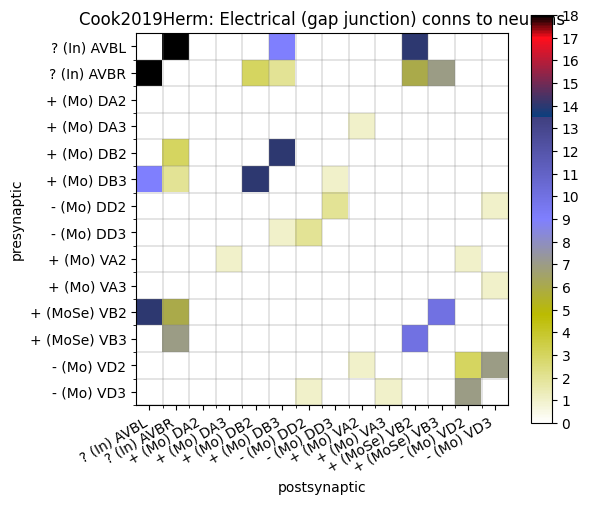

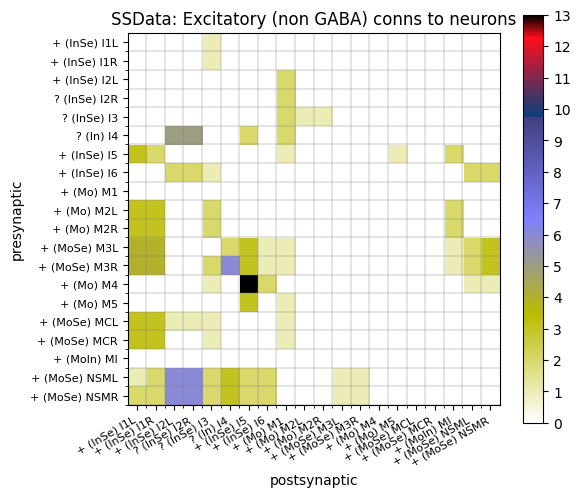

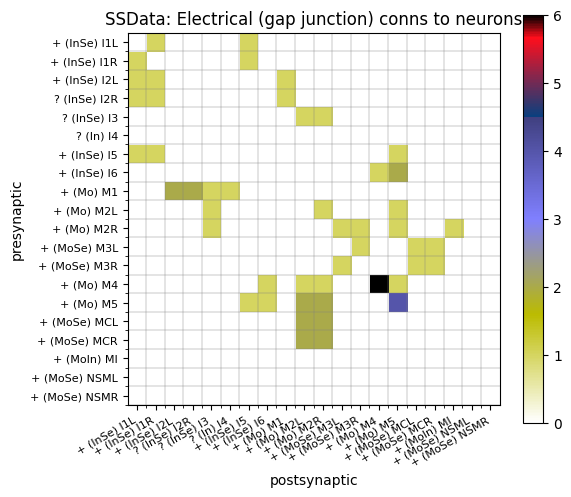

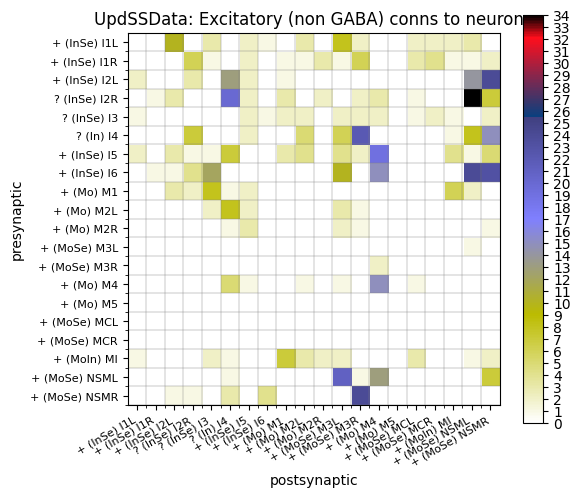

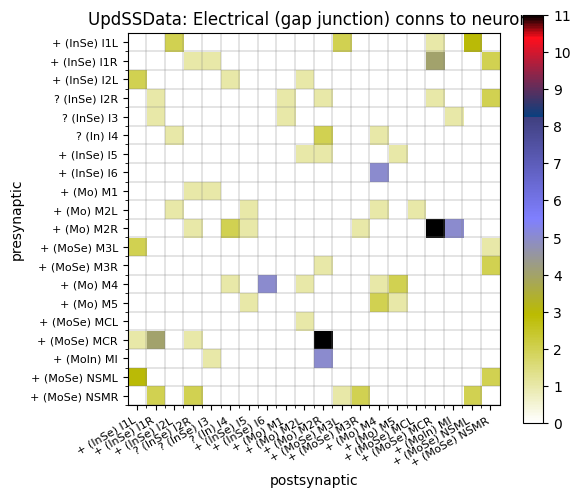

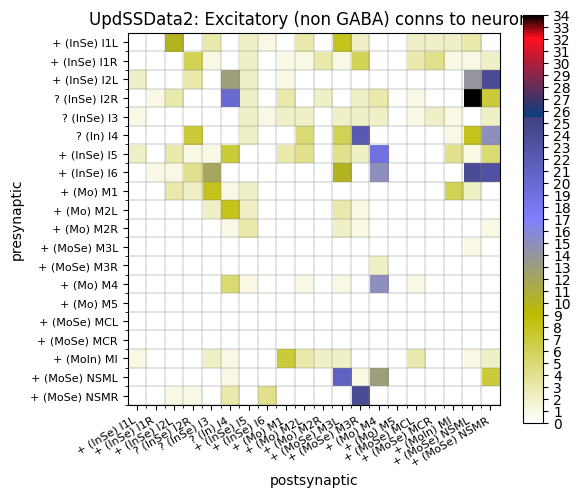

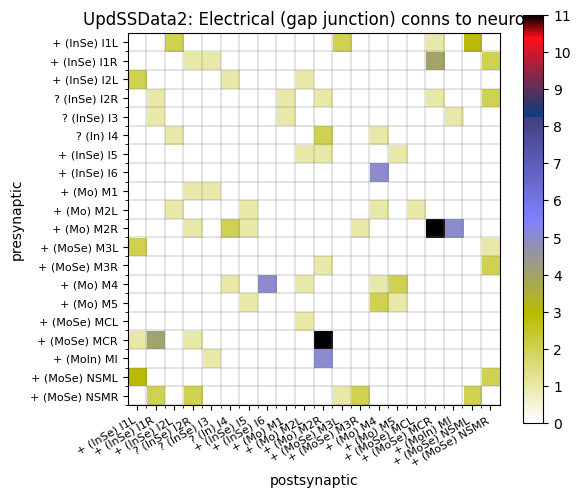

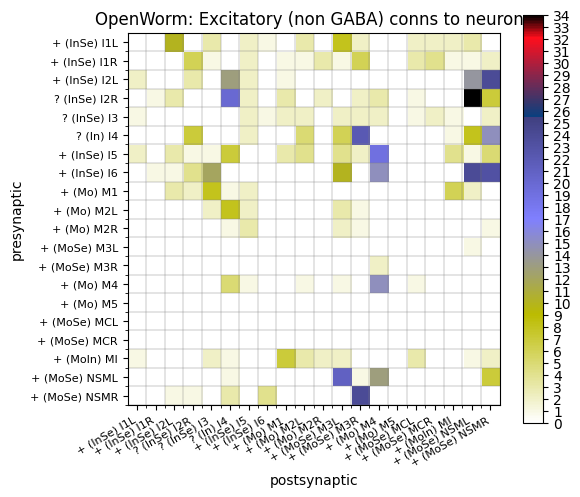

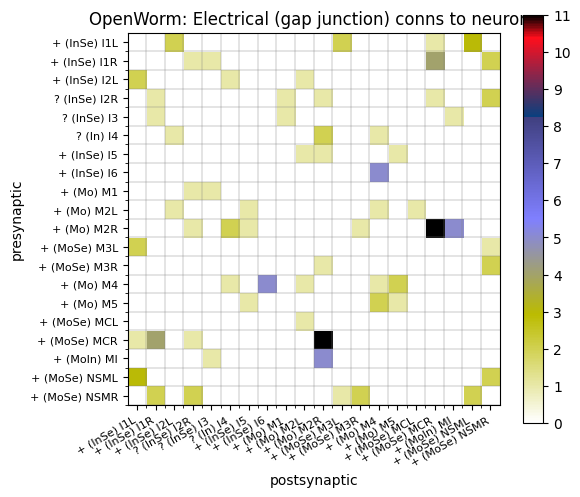

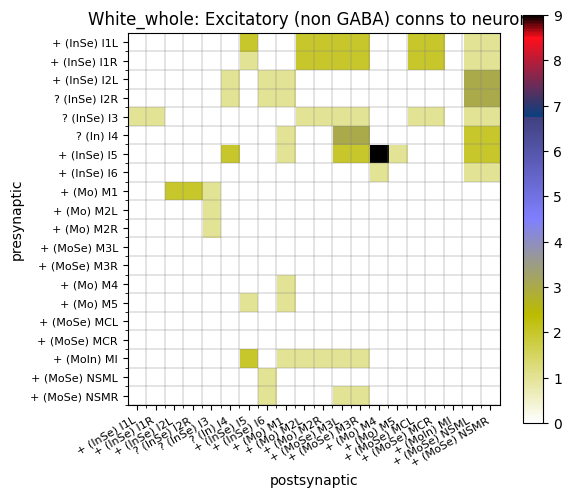

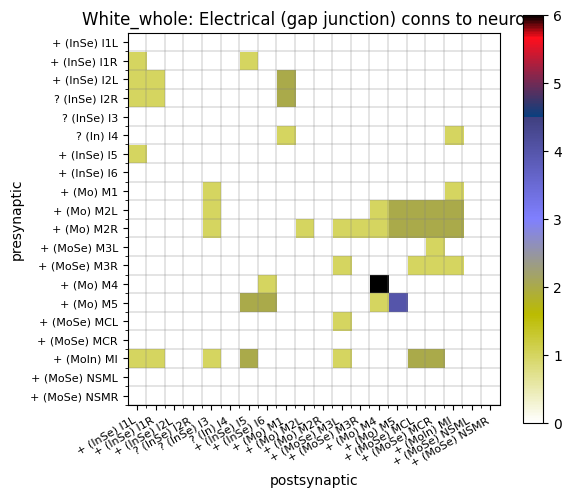

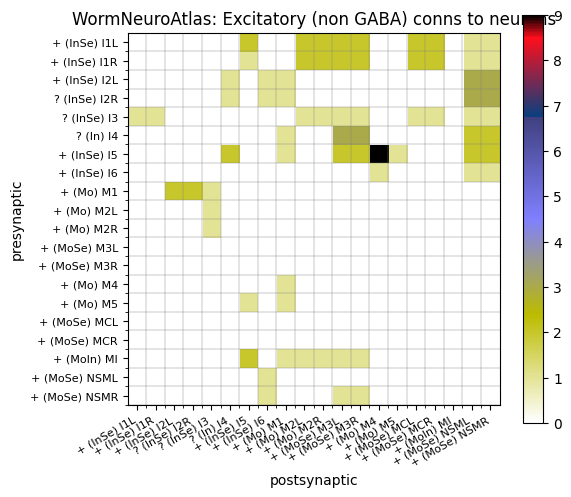

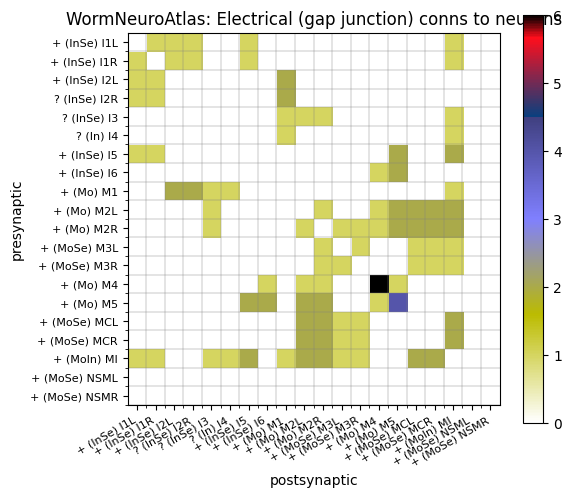

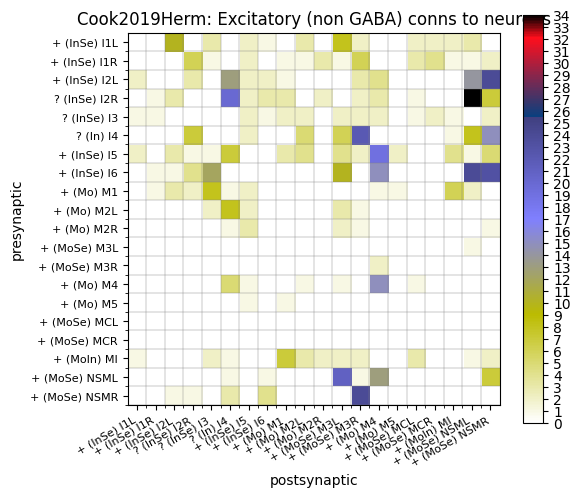

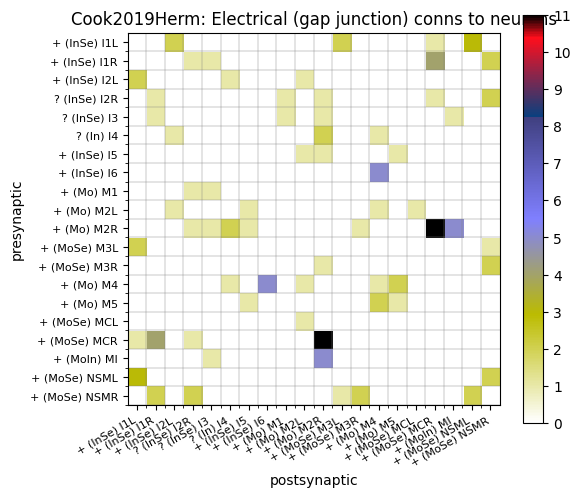

In [3]:

from neuroml.loaders import read_neuroml2_file
    
parameter_set = 'C1'

configs = ['Social','Oscillator', 'Pharyngeal']


import importlib as IM

for config in configs:
    
    with open('%s.md'%config, 'w') as f:
        
        f.write('|EXC|INH|GJ|\n')
        f.write('|-|-|-|\n')

        setup = IM.import_module('c302.c302_%s' % (config)).setup
        from c302.c302_utils import generate_conn_matrix

        import matplotlib.pyplot as plt

        plt.ioff()

        for reader_short in readers:
            
            reader_module = readers[reader_short]

            reader = reader_module[5:]

            print("\n=== Generating using reader %s (%s)"%(reader_module, reader_short))
            setup(parameter_set, 
                  generate=True, 
                  target_directory='images',
                  data_reader=reader,
                  verbose=False)

            nml_filename = 'c302_%s_%s.net.nml'%(parameter_set, config)

            nml_doc = read_neuroml2_file('images/%s'%nml_filename)
            nml_doc.networks[0].id = reader.replace('Reader','').replace('Spreadsheet','SS').replace('Updated','Upd')
            figsize=(6,6)
            if config=='Full' or config=='Full':
                figsize=(10,10)
            generate_conn_matrix(nml_doc, save_fig_dir='./images/%s'%config, figsize=figsize)
            
            f.write('|![---](./images/%s/%s_exc_to_neurons.png)|![---](./images/%s/%s_inh_to_neurons.png)|![---](./images/%s/%s_elec_neurons_neurons.png)|\n'%(config, reader_short,config, reader_short,config, reader_short))


    print('Finished generation of images!')



## Note: views of matrices moved to Oscillator.md etc.

